In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline
import os
from scipy.stats import gaussian_kde
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
if os.environ['COMPUTERNAME'] == 'DESKTOP-EQAO3M5':
  computer_flag = 'home'
else:
  computer_flag = 'office'

if computer_flag == 'home':
  file_dir = "F:/github/pythonScript/seafog/"
else:
  file_dir = "H:/github/python/seafog/"

In [7]:
file_radar = os.path.normpath(os.path.join(file_dir, './data/2023/radar01-vis.csv')) # 读取徐闻站分钟级数据
df_radar = pd.read_csv(file_radar,sep=',',na_values=[9999],parse_dates=['datetime'])
print(df_radar)

               datetime   vis
0   2023-01-12 00:05:38   953
1   2023-01-12 00:23:01  1272
2   2023-01-12 00:40:24   901
3   2023-01-12 00:57:47  1232
4   2023-01-12 01:15:10   774
..                  ...   ...
133 2023-01-13 22:38:59   591
134 2023-01-13 22:56:20   654
135 2023-01-13 23:13:41   708
136 2023-01-13 23:31:04   493
137 2023-01-13 23:48:24   519

[138 rows x 2 columns]


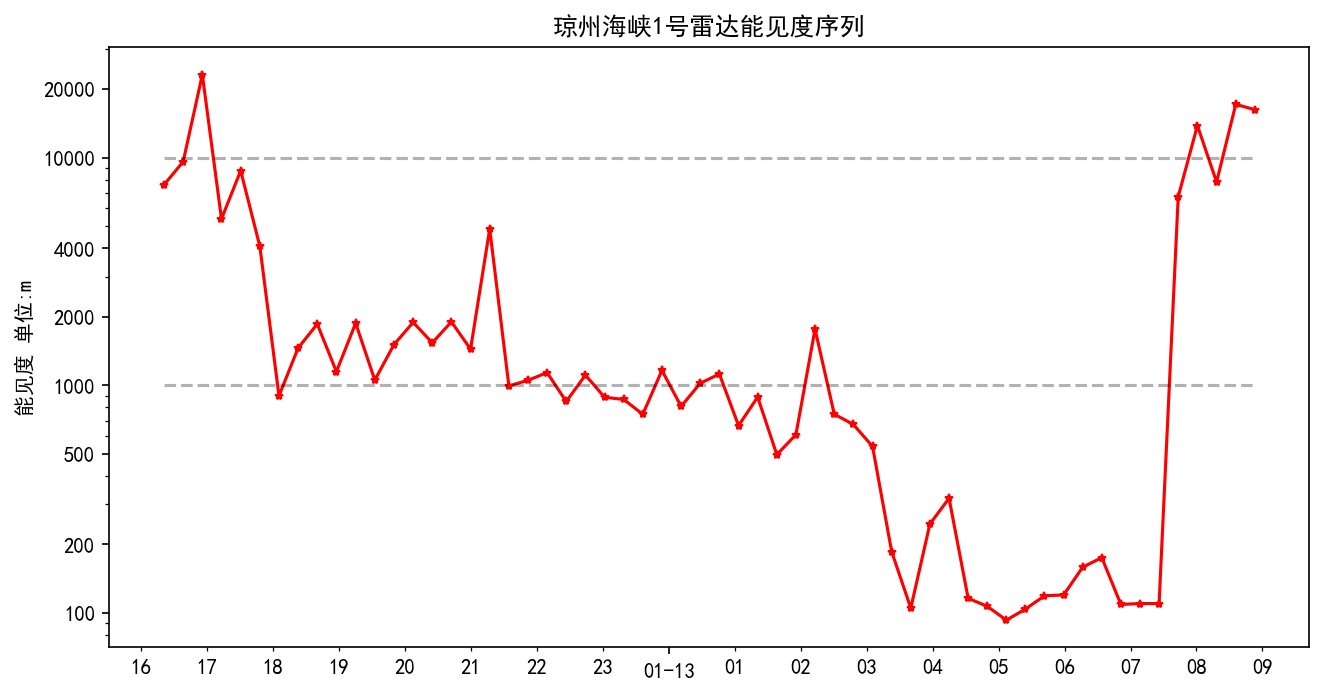

In [30]:
df_selected = df_radar.loc[(df_radar['datetime']>pd.to_datetime('2023-01-12 16:10:38')) & (df_radar['datetime']<pd.to_datetime('2023-01-13 09:10:38'))]
fig = plt.figure(figsize=(8, 4), dpi=150)  # 添加画布
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel("能见度 单位:m")
line_t2m, = ax.plot(df_selected['datetime'], df_selected['vis'], color='r', marker='*', markersize=4, label='能见度', zorder=2)

# 设置Y轴刻度格式
plt.yscale('log')
ax.set_yticks([50,100,200,500,1000,2000,4000,10000,20000])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

# 设置x轴主刻度格式
alldays = mdates.DayLocator()  # 主刻度为每天
ax.xaxis.set_major_locator(alldays)  # 设置主刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=00, labelsize=10)
# 设置副刻度格式
hoursLoc = mpl.dates.HourLocator(byhour=np.arange(1,24,1))  # 为6小时为1副刻度
ax.xaxis.set_minor_locator(hoursLoc)
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
ax.hlines(xmin=df_selected['datetime'].iloc[0], xmax=df_selected['datetime'].iloc[-1], y=[1000, 10000], colors='k',linestyles='dashed', alpha=0.3)
ax.set_title(f'琼州海峡1号雷达能见度序列')
plt.show()

In [22]:
df_selected['datetime'].iloc[0]

Timestamp('2023-01-12 16:21:00')